# Load Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D ,MaxPooling2D, MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model, save_model


from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

import numpy as np

import pandas as pd

image_path = "dataset_train/dataset/"
#!unzip dataset_train.zip

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Load Data

In [2]:
def loadDataSet(path):
    def loadImages(path):
        # literalmente dar load das imagens todas para estes arrays
        # Listas por compreencao for life <3
        real = [image.load_img(image_path+"real/"+file,target_size = (28,28), color_mode='grayscale') for file in os.listdir(image_path+"real")]
        fake = [image.load_img(image_path+"fake/"+file,target_size = (28,28), color_mode='grayscale') for file in os.listdir(image_path+"/fake")]
        return real,fake

    def imagesToArray(imgs):
        return np.array([image.img_to_array(img)[:,:,0] for img in imgs])
    
    real,fake = loadImages(path)
    real_array = imagesToArray(real)
    fake_array = imagesToArray(fake)
    return real_array,fake_array
  
real,fake = loadDataSet(image_path)
len(real),len(fake)

(20000, 20000)

# Train Val Test

In [3]:
X = np.append(real,fake,axis=0)
y = np.append(np.ones((20000,1)),np.zeros((20000,1)))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=13)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=13)
print("Train -> {} [{}%] ".format(len(y_train),len(y_train)/40000*100))
print("Val   -> {} [{}%] ".format(len(y_val),len(y_val)/40000*100))
print("Test  -> {} [{}%] ".format(len(y_test),len(y_test)/40000*100))


Train -> 24000 [60.0%] 
Val   -> 8000 [20.0%] 
Test  -> 8000 [20.0%] 


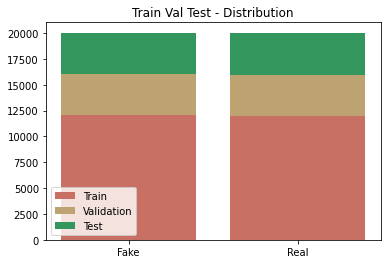

In [4]:
_, frequency_train = np.unique(y_train, return_counts = True)
_, frequency_val = np.unique(y_val, return_counts = True)
_, frequency_test = np.unique(y_test, return_counts = True)

plt.bar(["Fake","Real"], frequency_train,label ='Train',color="#C97064")
plt.bar(["Fake","Real"], frequency_val,label ='Validation',color="#BCA371",bottom=frequency_train)
plt.bar(["Fake","Real"], frequency_test,label ='Test',color="#32965D",bottom=np.add(frequency_train, frequency_test))
plt.legend()
plt.title("Train Val Test - Distribution")
plt.show()
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# Models

https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

## Xception
https://keras.io/api/applications/xception/

In [5]:
model_xception =tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(28,28,1),
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)

ValueError: If using `weights` as `"imagenet"` with `include_top` as true, `classes` should be 1000

# Modelo OP

In [5]:
model = Sequential()
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [49]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# opt = Adam(learning_rate=0.01)
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)
'''model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[Accuracy(), Precision(), Recall(), AUC()]
)'''

In [50]:
history = model.fit(X_train,y_train,epochs = 1 ,batch_size=32, validation_data = (X_val, y_val))

750/750 [==============================] - 151s 199ms/step - loss: 0.6202 - accuracy: 0.4975 - precision_7: 0.4975 - recall_7: 1.0000 - auc_7: 0.5000 - val_loss: 0.2768 - val_accuracy: 0.5015 - val_precision_7: 0.5015 - val_recall_7: 1.0000 - val_auc_7: 0.5000 preci


In [51]:
model.save("model_test_save")

INFO:tensorflow:Assets written to: model_test_save\assets


In [9]:
model = load_model('C:\\Users\\tferr\\Desktop\\ACA\\Projeto\\Project_Assignment_To_Students\\To_Students\\AML-Project\\Models\\Testes\\relu_relu_0.5\\model_drop0.5_epochs100_act-relu_relu')
model.evaluate(X_val, y_val)

250/250 [==============================] - 9s 36ms/step - loss: 0.6931 - accuracy: 0.4985


[0.6931461095809937, 0.4984999895095825]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_test, predictions, target_names = ['Fake (Class 0)','Real (Class 1)']))

In [ ]:
!unzip dataset_test.zip

In [ ]:

image_path = "dataset_test/dataset_test"

def loadTestSet(path):
    def loadImages(path):
        # literalmente dar load das imagens todas para estes arrays
        # Listas por compreencao for life <3
        images = [image.load_img(image_path+"/images/"+file,target_size = (28,28), color_mode='grayscale') for file in sorted(os.listdir(image_path+"/images"))]
        return images

    def imagesToArray(imgs):
        return np.array([image.img_to_array(img)[:,:,0] for img in imgs])
    
    images = loadImages(path)
    images_array = imagesToArray(images)
    return images_array
  
test_set = loadTestSet(image_path)

In [ ]:
test_set = test_set.reshape(-1, 28, 28, 1)
predictions = model.predict_classes(test_set)
predictions

In [ ]:
ids = [img.split(".")[0] for img in sorted(os.listdir("dataset_test/dataset_test/images"))]

In [ ]:
submition = pd.DataFrame((np.array([ids,predictions]).T),columns= ["Id","Category"])
submition = submition.astype(int).sort_values("Id")
submition.to_csv("Submition.csv",index=False)

In [ ]:
model.save('second_model')

## SVM Model

In [ ]:
from tensorflow.keras.layers.experimental import RandomFourierFeatures

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
RandomFourierFeatures(
      output_dim=64,
      trainable="True",
      kernel_initializer='gaussian'),

model.add(Dense(units=2, activation='softmax')),

opt = Adam(lr=0.01)
model.compile(optimizer = opt , loss = "hinge" , metrics = ['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train,y_train,epochs = 100 , validation_data = (X_val, y_val))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(val_loss))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# RNN Model

In [ ]:
from tensorflow.keras import layers

model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
# Add a LSTM layer with 128 internal units.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.LSTM(128))


model.add(Dense(units=2, activation='softmax')),

opt = Adam(lr=0.01)
model.compile(optimizer = "adam" , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
model.summary()


In [ ]:
history = model.fit(X_train,y_train,epochs = 100 , validation_data = (X_val, y_val))

## scikit-learn

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
from skimage import color
from skimage.feature import hog


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [ ]:
# create an instance of each transformer
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_hog = hogify.fit_transform(X_train)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)